<a href="https://colab.research.google.com/github/uuuuju/Machine-Learning-Models/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(43) #seed for reproducible results
import math
from sklearn.datasets import make_blobs

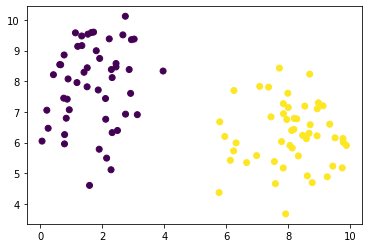

In [5]:
(X,y) =  make_blobs(n_samples=100,n_features=2,centers=2,cluster_std=1.05,random_state=20) #We will be using logistic regression for classification of a data point into these 2 clases
#we need to add 1 to X values (we can say its bias)
X1 = np.c_[np.ones((X.shape[0])),X]

plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)
plt.show()

In [6]:
X

array([[ 1.89783329,  5.7839784 ],
       [ 6.66013694,  5.34738182],
       [ 9.77316066,  6.13215277],
       [ 7.84705093,  7.26664277],
       [ 7.44730427,  6.8383583 ],
       [ 2.13802936,  5.49384956],
       [ 6.25143787,  7.69641577],
       [ 0.75228924,  7.4477011 ],
       [ 3.02735286,  9.37366055],
       [ 1.51117278,  8.437006  ],
       [ 1.50711032,  7.81774231],
       [ 8.11629532,  6.39557726],
       [ 8.77925074,  4.69433223],
       [ 2.48816825,  6.39426897],
       [ 9.12977216,  7.19915763],
       [ 8.1965279 ,  6.7883236 ],
       [ 8.33284692,  5.56579953],
       [ 2.31603923,  6.32561879],
       [ 8.62054358,  4.91508274],
       [ 6.24037808,  5.72900017],
       [ 0.89248861,  8.07402454],
       [ 7.71951088,  8.42714624],
       [ 0.77676001,  5.9577373 ],
       [ 9.2654456 ,  4.88536856],
       [ 6.98336844,  5.57512367],
       [ 0.83284821,  6.7944661 ],
       [ 0.78093117,  6.26063483],
       [ 7.37044138,  7.80827292],
       [ 0.20611172,

In [7]:
X1.shape

(100, 3)

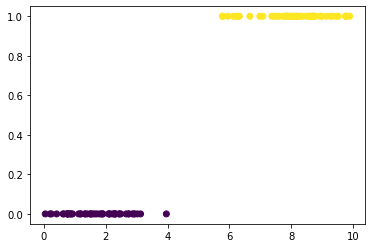

In [8]:
plt.scatter(X1[:,1],y,marker='o',c=y)
plt.show()

In [9]:
W=np.random.uniform(size=X1.shape[1])
W

array([0.11505457, 0.60906654, 0.13339096])

In [10]:
def sigmoid(x):
    return float(1.0 / float((1.0 + np.exp(-1.0*x))))

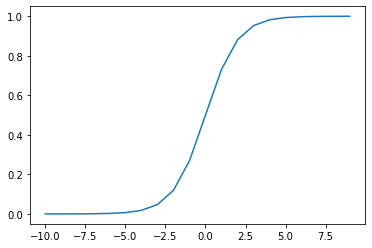

In [11]:
sx=range(-10,10)
sy=[]
for i in sx:
    sy.append(sigmoid(i))

plt.plot(sx,sy)
plt.show()

In [12]:
def predict():
    predicted_y=[]
    
    for x in X1:
        
        logit = x.dot(W) #ϴ0+ϴ1*X
        predicted_y.append(sigmoid(logit)) 
        
    return np.array(predicted_y)

In [14]:
def cost_function(predicted_y): 
    
    error=(-y*np.log(predicted_y)) - ((1-y)*np.log(1-predicted_y))
    cf=(1/X1.shape[0])*sum(error)
    
    return cf,error

In [17]:
def gradient_descent(lrate,epochs): 
    
    total_expected_error=float("inf")
    errorlist=[]
    finalepoch=0
    
    for epoch in range(epochs):
        global W
        
        predictedY=predict() 
        total_error,error = cost_function(predictedY)
        
        gradient=X1.T.dot(error)/X1.shape[0]
        
        if epoch%10==0:
            errorlist.append(total_error)
            finalepoch+=1
          
        if (total_expected_error<total_error):
            return errorlist,finalepoch
            
        total_expected_error=total_error
        
        for (i,w) in enumerate(gradient):
            W[i]+=float(-lrate)*w
            
    return errorlist,finalepoch    

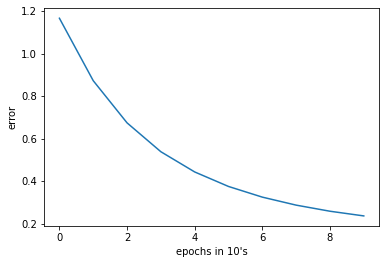

In [18]:
total_error,finalepoch=gradient_descent(0.001,100)
#plotting 
plt.plot(range(finalepoch),total_error)
plt.xlabel("epochs in 10's")
plt.ylabel("error")
plt.show()

In [19]:
yhat= predict() # we get the probablities scores (between 0 and 1)

#if the score is above 0.5 lets make it 1 else make it 0
for i,v in enumerate(yhat):
    if v >=0.56: 
        yhat[i]=1
    else:
        yhat[i]=0

yhat.astype(int)

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [20]:
#actual y
y  

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [21]:
#error and acuracy 
error=sum((yhat-y)**2)
print(error)
accuracy=1-(error/100)
accuracy 

0.0


1.0

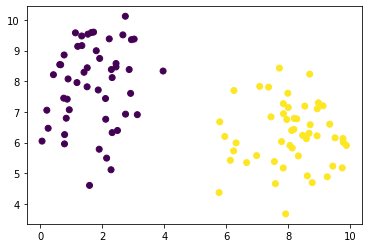

In [22]:
plt.scatter(X1[:,1],X1[:,2],marker='o',c=yhat)
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X1,y)  

predict_y=clf.predict(X1)

In [24]:
#error and acuracy 
error=sum((predict_y-y)**2)
print(error)
accuracy=1-(error/100)
accuracy

0


1.0

In [26]:
predict_y

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1])